# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tucurui
Processing Record 2 of Set 1 | launceston
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | lolua
City not found. Skipping...
Processing Record 9 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | buraydah
Processing Record 13 of Set 1 | yazd
Processing Record 14 of Set 1 | rocha
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | darhan
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | trairi
Processing Record 22 o

Processing Record 38 of Set 4 | tidore
City not found. Skipping...
Processing Record 39 of Set 4 | paralimni
Processing Record 40 of Set 4 | sao joao da barra
Processing Record 41 of Set 4 | sao borja
Processing Record 42 of Set 4 | pontianak
Processing Record 43 of Set 4 | bloomingdale
Processing Record 44 of Set 4 | wiarton
Processing Record 45 of Set 4 | samana
Processing Record 46 of Set 4 | guarapari
Processing Record 47 of Set 4 | matagami
Processing Record 48 of Set 4 | mar del plata
Processing Record 49 of Set 4 | sawtell
Processing Record 0 of Set 5 | san rafael
Processing Record 1 of Set 5 | kutum
Processing Record 2 of Set 5 | chitral
Processing Record 3 of Set 5 | lahij
Processing Record 4 of Set 5 | nkan
Processing Record 5 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 5 | moree
Processing Record 7 of Set 5 | nsanje
Processing Record 8 of Set 5 | narsaq
Processing Record 9 of Set 5 | gidam
Processing Record 10 of Set 5 | buta
Processing Rec

Processing Record 30 of Set 8 | vila franca do campo
Processing Record 31 of Set 8 | rutland
Processing Record 32 of Set 8 | ust-nera
Processing Record 33 of Set 8 | utiroa
City not found. Skipping...
Processing Record 34 of Set 8 | kahului
Processing Record 35 of Set 8 | vao
Processing Record 36 of Set 8 | evensk
Processing Record 37 of Set 8 | la ronge
Processing Record 38 of Set 8 | barbar
City not found. Skipping...
Processing Record 39 of Set 8 | dosso
Processing Record 40 of Set 8 | tautira
Processing Record 41 of Set 8 | castrillon
Processing Record 42 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 43 of Set 8 | kuche
City not found. Skipping...
Processing Record 44 of Set 8 | kandrian
Processing Record 45 of Set 8 | kavaratti
Processing Record 46 of Set 8 | abu kamal
Processing Record 47 of Set 8 | san policarpo
Processing Record 48 of Set 8 | portland
Processing Record 49 of Set 8 | tahta
Processing Record 0 of Set 9 | malanje
Processing Record 1 of Set 9

Processing Record 13 of Set 12 | cassilandia
Processing Record 14 of Set 12 | jurmala
Processing Record 15 of Set 12 | banyo
Processing Record 16 of Set 12 | pevek
Processing Record 17 of Set 12 | touros
Processing Record 18 of Set 12 | ambovombe
Processing Record 19 of Set 12 | bambanglipuro
Processing Record 20 of Set 12 | cabra
Processing Record 21 of Set 12 | ardakan
Processing Record 22 of Set 12 | mortka
Processing Record 23 of Set 12 | yatou
Processing Record 24 of Set 12 | darab
Processing Record 25 of Set 12 | berasia
Processing Record 26 of Set 12 | nyurba
Processing Record 27 of Set 12 | phonhong
Processing Record 28 of Set 12 | kindu
Processing Record 29 of Set 12 | pundaguitan
Processing Record 30 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 31 of Set 12 | massillon
Processing Record 32 of Set 12 | bugene
Processing Record 33 of Set 12 | madras
Processing Record 34 of Set 12 | poya
Processing Record 35 of Set 12 | leshukonskoye
Processing Record 36 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tucurui,-3.7661,-49.6725,22.68,97,87,1.28,BR,1676265040
1,launceston,-41.4500,147.1667,23.67,41,100,4.12,AU,1676264993
2,punta arenas,-53.1500,-70.9167,5.06,75,40,2.57,CL,1676265023
3,busselton,-33.6500,115.3333,28.62,35,0,5.07,AU,1676265041
4,esperance,-33.8667,121.9000,24.13,51,0,6.66,AU,1676265039


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tucurui,-3.7661,-49.6725,22.68,97,87,1.28,BR,1676265040
1,launceston,-41.4500,147.1667,23.67,41,100,4.12,AU,1676264993
2,punta arenas,-53.1500,-70.9167,5.06,75,40,2.57,CL,1676265023
3,busselton,-33.6500,115.3333,28.62,35,0,5.07,AU,1676265041
4,esperance,-33.8667,121.9000,24.13,51,0,6.66,AU,1676265039


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

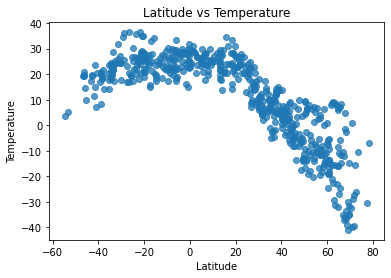

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp, marker = "o", alpha = 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

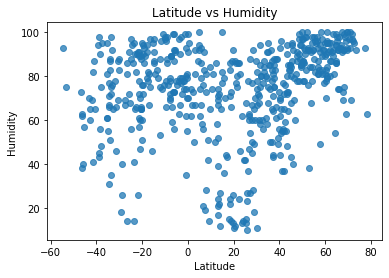

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
lat = city_data_df["Lat"]
hum = city_data_df["Humidity"]
plt.scatter(lat, hum, marker = "o", alpha = 0.75)


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

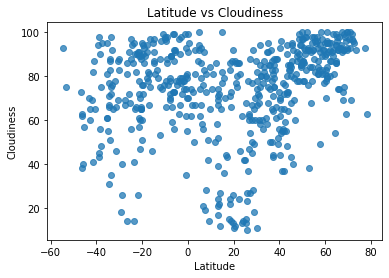

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
lat = city_data_df["Lat"]
cloud = city_data_df["Cloudiness"]
plt.scatter(lat, hum, marker = "o", alpha = 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

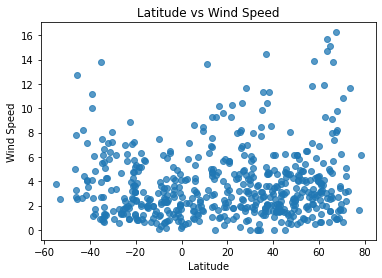

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]
plt.scatter(lat, wind, marker = "o", alpha = 0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def regression_plot(x_data,y_data, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    regression_value = x_data * slope + intercept
    regression_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_data, y_data)
    plt.plot(x_data,regression_value,"r-")
    plt.title(f"The r value is: {rvalue}")
    plt.annotate(regression_line,xy =(x, y),fontsize=15,color="red")


    



In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >0] 
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,upernavik,72.7868,-56.1549,-26.01,95,100,3.22,GL,1676265042
6,albany,42.6001,-73.9662,0.40,76,96,1.50,US,1676264872
9,buraydah,26.3260,43.9750,12.25,37,100,6.89,SA,1676264769
10,yazd,31.8972,54.3675,2.06,80,75,2.06,IR,1676265044
15,saint george,37.1041,-113.5841,9.58,44,0,5.14,US,1676265046


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tucurui,-3.7661,-49.6725,22.68,97,87,1.28,BR,1676265040
1,launceston,-41.4500,147.1667,23.67,41,100,4.12,AU,1676264993
2,punta arenas,-53.1500,-70.9167,5.06,75,40,2.57,CL,1676265023
3,busselton,-33.6500,115.3333,28.62,35,0,5.07,AU,1676265041
4,esperance,-33.8667,121.9000,24.13,51,0,6.66,AU,1676265039


###  Temperature vs. Latitude Linear Regression Plot

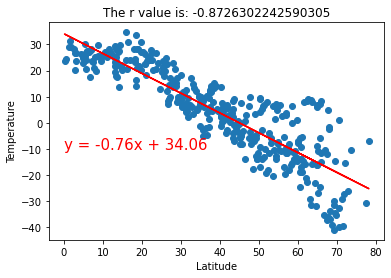

In [59]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
northern_lat = northern_hemi_df['Lat']
northern_max_temp = northern_hemi_df['Max Temp']
x= 0
y= -10
regression_plot(northern_lat,northern_max_temp,x,y)

plt.ylabel("Temperature")
plt.xlabel("Latitude")



plt.show()

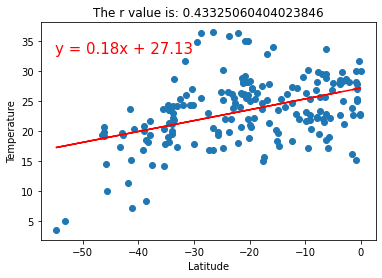

In [60]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
southern_lat = southern_hemi_df['Lat']
southern_max_temp = southern_hemi_df['Max Temp']
x= -55
y= 33
regression_plot(southern_lat,southern_max_temp,x,y)



plt.ylabel("Temperature")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** There is a positive linear relationship in the southern hemisphere between latitude and temperature. As we can see when we get closer to the equator the temperature becomes more warm. However, the R value is 0.43 which is not that significant. On the other hand, we see that in the northern hemisphere when we move away from the equater the temperature drops giving a negative relationship. The R value for the northern hemisphere is abs(0.87) which indicates a strong and significant relationship between the x and y variable.

### Humidity vs. Latitude Linear Regression Plot

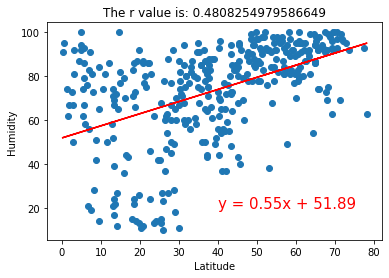

In [63]:
# Northern Hemisphere
# YOUR CODE HERE
northern_hum_df = northern_hemi_df['Humidity'] 
northern_lat_df = northern_hemi_df['Lat'] 

x= 40
y=20
regression_plot(northern_lat_df,northern_hum_df,x,y)



plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

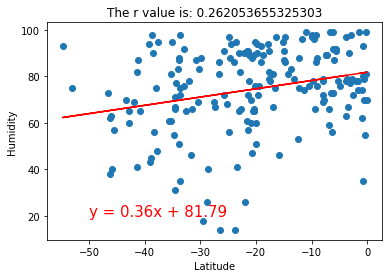

In [67]:
# Southern Hemisphere
# YOUR CODE HERE
southern_hum_df = southern_hemi_df['Humidity'] 
southern_lat_df = southern_hemi_df['Lat'] 

x= -50
y=20
regression_plot(southern_lat_df,southern_hum_df,x,y)



plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** In the northern hempisphere we can see that as we move away from the equater the humidity increase. In the southern hempisphere we can that as we get closer to the equater the humidity increases as well. They are both positive linear relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

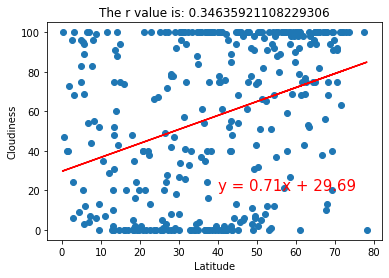

In [68]:
# Northern Hemisphere
# YOUR CODE HERE
northern_cloud_df = northern_hemi_df['Cloudiness'] 
northern_lat_df = northern_hemi_df['Lat'] 

x= 40
y=20
regression_plot(northern_lat_df,northern_cloud_df,x,y)



plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

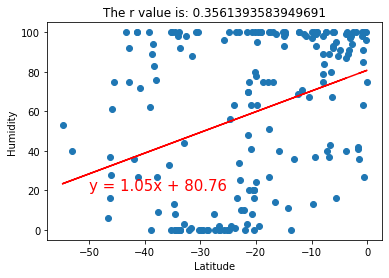

In [70]:
# Southern Hemisphere
# YOUR CODE HERE
southern_cloud_df = southern_hemi_df['Cloudiness'] 
southern_lat_df = southern_hemi_df['Lat'] 

x= -50
y=20
regression_plot(southern_lat_df,southern_cloud_df,x,y)



plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** We can not see any relationship between the latitude and the cloudiness of a hemisphere. As displayed in the charts, the points does not have any pattern and the R value are both under 0.5 meaning there is no significant relationship between the x and y variable.

### Wind Speed vs. Latitude Linear Regression Plot

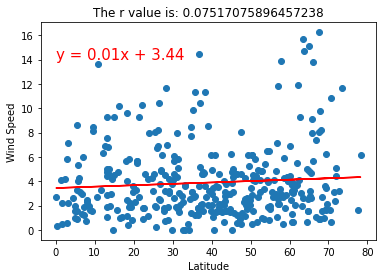

In [78]:
# Northern Hemisphere
# YOUR CODE HERE
northern_wind_df = northern_hemi_df['Wind Speed'] 
northern_lat_df = northern_hemi_df['Lat'] 

x= 0
y= 14
regression_plot(northern_lat_df,northern_wind_df,x,y)



plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

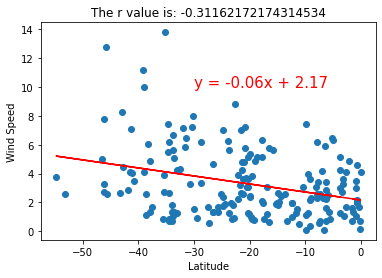

In [76]:
# Southern Hemisphere
# YOUR CODE HERE
southern_wind_df = southern_hemi_df['Wind Speed'] 
southern_lat_df = southern_hemi_df['Lat'] 

x= -30
y= 10
regression_plot(southern_lat_df,southern_wind_df,x,y)



plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** There is no significant relationship between the wind speed and temperature since both R values are both under 0.5